jGCaMP8f
1-10AP fit:
  R^2 = 0.78
  slope = 0.176
1-40AP fit
  R^2 = 0.749
  slope = 0.0635
jGCaMP8m
1-10AP fit:
  R^2 = 0.819
  slope = 0.279
1-40AP fit
  R^2 = 0.696
  slope = 0.081
jGCaMP8s
1-10AP fit:
  R^2 = 0.594
  slope = 0.228
1-40AP fit
  R^2 = 0.432
  slope = 0.0519
GCaMP6s
1-10AP fit:
  R^2 = 0.571
  slope = 0.158
1-40AP fit
  R^2 = 0.724
  slope = 0.12
jGCaMP7f
1-10AP fit:
  R^2 = 0.793
  slope = 0.218
1-40AP fit
  R^2 = 0.847
  slope = 0.109
jGCaMP7s
1-10AP fit:
  R^2 = 0.738
  slope = 0.32
1-40AP fit
  R^2 = 0.738
  slope = 0.11
jGCaMP7c
1-10AP fit:
  R^2 = 0.592
  slope = 0.177
1-40AP fit
  R^2 = 0.736
  slope = 0.175
XCaMP-Gf
1-10AP fit:
  R^2 = 0.859
  slope = 0.163
1-40AP fit
  R^2 = 0.926
  slope = 0.0901


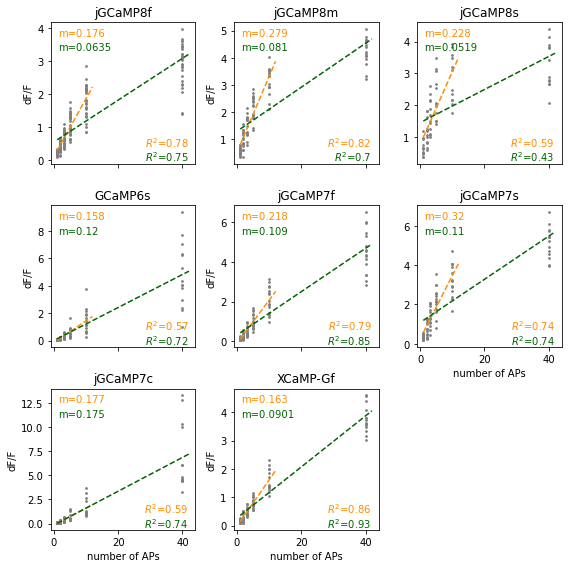

In [16]:
'''
linearity analysis of jGCaMP8
[1,2,3,5,10,40] AP stimuli
'''
'''
grand average plots based on pile_all mat files generated by compare_constructs_GCaMP96uf
look across all APs
@note
    - THE DATA BEING LOADED DOES NOT HAVE MODIFICATIONS TO SNR CALCULATION IN NAA_Curation, SO DO NOT USE SNR FROM THIS DATASET
    - to use SNR, re-run NAA_Curation on the linearity data (may need to merge master into linearity)
'''

from scipy.io import loadmat
import numpy as np
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

%matplotlib inline

def computeReg(aps,y):
    '''
    compute linear regression
        aps: all AP e.g. [1,2,3,5,10,40]
        y: array of dff size [nAPs, n_wells]
    
    return regression coefs
    '''
    X = np.array([np.repeat(ap,n_wells) for ap in aps]).ravel().reshape(-1,1)
    y = y.ravel()
    reg = LinearRegression().fit(X, y)
    r_squared = reg.score(X, y)
    slope = reg.coef_[0]
    print('  R^2 = {:.3}'.format(r_squared))
    print('  slope = {:.3}'.format(slope))
    # print('  RMSE: {:.3f}'.format(mean_squared_error(y, y_pred)))
    
    y_pred = reg.predict(X)
    
    return (reg, r_squared, slope)

all_APs = [1,2,3,5,10,40] # all APs in the dataset
n_APs = len(all_APs)
html_write_dir = r'D:\site\ilyakolb.github.io\interactive_norm_plots.html'
pdf_dir = r"D:\ufgcamp_paper_data\culture-screen-figs/norm_plots.pdf"
plot_mat = loadmat(r'data/unnormPlots_singleWells_struct_linearity.mat')

# labels and order of legend
# hits_label = [construct1, construct2, ...] or 'all' will plot all
hits_label = ['jGCaMP8f', 'jGCaMP8m', 'jGCaMP8s', 'GCaMP6s', 'jGCaMP7f', 'jGCaMP7s', 'jGCaMP7c', 'XCaMP-Gf']# [h[0] for h in hits[0]]

var_title = '' # variable to look at

# add AP nums to df column names
var_titles = [var_title+' {} AP'.format(i) for i in all_APs]

df_cols = var_titles.copy()
df_cols.insert(0,'construct')


# magnify the kinetics of the following hits
magnify_hits_label = ['jGCaMP8f', 'jGCaMP8m', 'jGCaMP8s']

all_data = plot_mat['unnormPlots_singleWells_struct'][0]

all_constructs = [c[0] for c in all_data['construct']] # all available constructs in dataset

if hits_label == 'all':
    hits_label = all_constructs
# confirm that number of APs in dataset matches what we expect
assert n_APs == all_data[0][1].shape[0], 'Unexpected number of stimuli!'

# create dataframe
df = pd.DataFrame(columns=df_cols)

n_subplot_cols = 3
n_subplot_rows = int(np.ceil(len(hits_label)/n_subplot_cols))

f = plt.figure(figsize=(8,8))
for subplot_idx,hit in enumerate(hits_label):
    
    ax = plt.subplot(n_subplot_rows, n_subplot_cols, subplot_idx+1)
    construct_idx = np.argwhere(np.array(all_constructs) == hit)[0][0] # find corresponding entry in array
    n_wells = len(all_data[construct_idx][1][0])

    dff = all_data[construct_idx][1]
    
    x = np.array([var_title for i in range(n_wells) for var_title in var_titles])
    df_construct = pd.DataFrame(np.array([x, dff.ravel('F')]).T, columns = ['number of APs', 'dF/F'])
    df_construct = df_construct.astype({'dF/F':'float'})
    
    print('=======\n{}'.format(all_constructs[construct_idx]))
    print('1-10AP fit:')
    (fit_1_10, r_squared_1_10, slope_1_10) = computeReg(all_APs[:-1],dff[:-1])
    print('1-40AP fit')
    (fit_1_40, r_squared_1_40, slope_1_40) = computeReg(all_APs,dff)
    
    
    # plot individual points
    for i,ap in enumerate(all_APs):
        ax.scatter([ap]*n_wells, dff[i,], color='gray', s=3)
    
    # plot fit to 1-10 APs
    x_fit = np.array([1,12])
    ax.plot(x_fit, fit_1_10.predict(x_fit.reshape(-1,1)), color='darkorange', linestyle='dashed')
    ax.text(0.05,0.9, 'm={:.3}'.format(slope_1_10), transform=ax.transAxes, color='darkorange', size=10)
    ax.text(0.95,0.1, '$R^2$={:.2}'.format(r_squared_1_10), transform=ax.transAxes, color='darkorange', size=10, ha='right', va='bottom')
    
    # plot fit to 1-40 APs
    x_fit = np.array([1,42])
    plt.plot(x_fit, fit_1_40.predict(x_fit.reshape(-1,1)), color='darkgreen', linestyle='dashed')
    ax.text(0.05,0.8, 'm={:.3}'.format(slope_1_40), transform=ax.transAxes, color='darkgreen', size=10)
    ax.text(0.95,0, '$R^2$={:.2}'.format(r_squared_1_40), transform=ax.transAxes, color='darkgreen', size=10, ha='right', va='bottom')
    
    # y label on left side only
    if np.mod(subplot_idx+1, n_subplot_cols):
        ax.set_ylabel('dF/F')
    
    # xtick, xlabel on bottom row
    if (subplot_idx+1) in (len(hits_label) - np.arange(0,3)):
        ax.set_xlabel('number of APs')
    else:
        ax.set_xticklabels('')
    
    plt.title(all_constructs[construct_idx])
plt.tight_layout()
f.savefig('figs/linearity.pdf')

In [ ]:
from sklearn.metrics import mean_squared_error

reg1 = computeReg(all_APs[:-1],dff[:-1])
reg2 = computeReg(all_APs,dff)

f = plt.figure()
for i,ap in enumerate(all_APs):
    plt.scatter([ap]*n_wells, dff[i,], color='gray')

y1_pred = reg1.predict(x_lin[:,np.newaxis])
y2_pred = reg1.predict(x_lin[:,np.newaxis])

mean_squared_error(y_true, y1_pred)

x_lin = np.array(all_APs)
plt.plot(x_lin, y1_pred, color='blue')
plt.plot(x_lin, y2_pred, color='red')

In [ ]:
dff.shape